<h3> Desenvolvimento de uma rede neural que maximiza os acertos se uma notícia irá ser popular </h3>
<h5> Alunas: Elaine Sangali, Ana Frozza </h5> <br>

<h3> Introdução </h3>
<p> O presente trabalho tem como objetivo projetar uma rede neural artificial que maximize os acertos de uma base de dados de notícias, onde o objetivo é prever se uma notícia obterá sucesso ou não. Para o desenvolvimento da rede será utilizado o Keras. Será testado vários métodos e valores de entradas para tentar obter o maior número de acerto possível. O conteúdo teórico deste trabalho pode ser encontrado no site do </p> 
[deeplearningbook.com.br](http://deeplearningbook.com.br/capitulos/). 

<h4> Redes neurais</h4>

<p> Uma rede neural tem como objetivo imitar como o cérebro humano aprende. Ela é um mecanismo de aprendizado de máquina muito poderoso, à medida que uma tarefa se torna complicada, há vários perceptrons que formam uma rede que transmitem informações entre si. Um perceptron representa um neurônio. O modelo do Perceptron foi desenvolvido nas décadas de 1950 e 1960 pelo cientista Frank Rosenblatt. Hoje é mais utilizado outros modelos de neurônnios artificias, mas esse seria um modelo básico, como mostra a figura 1, onde o perceptron rece várias entradas, x1; x2; x3 e produz uma única saída binária. </p>

![modelo basico perceptron](https://i0.wp.com/deeplearningbook.com.br/wp-content/uploads/2017/12/perceptron.png?w=280) <center> *figura 1 - Modelo básico de um perceptron* </center>

<p> No modelo da figura 1, o perceptron possui três entradas, x1; x2; x3, para calcular a saída, Rosenblatt introduziu pesos, w1; w2; w3, números reais que representam a importância das entradas para a saída, assim a entrada x1 possui peso w1, x2 peso w2 e x3 peso w3. A saída do neurônio é binária, 0 ou 1, e é determinada pela soma ponderada, Σjwjxj, menor ou maior do que algum valor limiar (threshold), como mostra a figura 2. </p>

![termo algébrico](https://i2.wp.com/deeplearningbook.com.br/wp-content/uploads/2017/12/output.png?w=362) <center> *figura 2 - Modelo algébrico da saída de um perceptron* </center>

<p> O modelo da figura 1 seria um modelo básico de um perceptron, mas atualmente é utilizado modelos mais completos que obtem melhores resultados, como o modelo da figura 3. O modelo da figura 1, simplesmente utiliza uma somatória do produto dos pesos com as entradas, mas esse é um modelo muito simples para determinados problemas. No modelo da figura 3, a função de ativação g(.) usará a saída u em uma função, e o resultado do perceptron será a saída da função g. O simbolo Θ representa o viés (bias), que são utilizados no lugar do threshold, os bias são ajustadas da mesma forma que os pesos sinápticos, o bias permite que um neurônio apresente a saída não nula ainda que todas as suas entradas sejam nulas. O bias representa o quão fácil é fazer o perceptron produzir um 1 (disparar). Um perceptron com um viés muito grande tem uma tendência a emitir um 1, e muito pequeno de emitir 0. </p>

![modelo matemático neuronio](https://i0.wp.com/deeplearningbook.com.br/wp-content/uploads/2018/01/neuronio.jpeg?resize=300%2C137)  <center> *figura 3 - Modelo de perceptron com bia e função de ativação* </center>

<p>O novo modelo utiliza uma função de soma um pouco diferente, ainda é realizado a soma dos produtos dos pesos com as entradas, mas no fim é somado o valor do viés, como mostra a figura 4.</p>

![modelo matemático neuronio](https://i1.wp.com/deeplearningbook.com.br/wp-content/uploads/2017/12/formula.png?w=295)  <center> *figura 4 - Modelo algébrico com o viés* </center>

<p>Um único perceptron não consegue resolver os problemas grandes, para isso é necessário uma rede de perceptrons. Há três categorias de tipos de redes de perceptrons (Arquiteturas):<p>
<ol>
    <li>Redes Neurais Feed-Forward: São mais comuns, a primeira camada é a entrada e a última camada é a saída, se houver uma camada oculta entre as duas, é chamado de redes neurais profundas(Deep Learning). A rede calcula uma série de transformação que altera a semelhança entre os casos, as atividades dos neurônios em cada camada são uma função não-linear das atividades na camada anterior. </li>
    <li>Redes Recorrentes: Essa rede é utilizada quando para se obter o valor de saída atual é necessário analisar o valor do passado. Essa rede é equivalente a redes muito profundas com uma camada oculta por fatia de tempo; exceto que eles usam os mesmos pesos em cada fatia de tempo e recebem entrada em cada fatia. Eles têm a capacidade de lembrar informações em seu estado oculto por um longo período de tempo, mas é muito difícil treiná-las para usar esse potencial. Podem possuir uma dinâmica complicada, sendo difíceis de treinar, mas são mais biologicamente realistas.</li>
    <li>Redes Conectadas Simetricamente: São como as redes recorrentes mas elas possuem o mesmo peso em ambas as direções.  As redes conectadas simetricamente sem unidades ocultas são chamadas de “Redes Hopfield”. As redes conectadas simetricamente com unidades ocultas são chamadas de “Máquinas de Boltzmann”. </li>
</ol>    

O trabalho atual se enquadra na categoria Redes Neurais Feed-Forward, a arquitetura utilizada é a Redes Multilayer Perceptrons (MLP), a rede MLP é composta por mais de um perceptron, e possui uma camada de entrada, uma de saída que toma uma decisão sobre a entrada, e entre as duas pode haver várias camadas ocultas. O MLP é muito utilizado em problemas de aprendizagem supervisionados, ele treina um conjunto de pares entrada-saída e aprende a modelar a correlação entre as entradas e saídas, no treinamento é realizado o ajuste dos parâmetros, pesos e bias da rede para conseguir minimizar o erro.  O backpropagation é usado para fazer os ajustes dos pesos e de bias em relação ao erro, e o próprio erro pode ser medido de várias maneiras, inclusive pelo erro quadrático médio.

<h4> Base de dados: Online News Popularity </h4>

A base de dados [Online News Popularity](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) possui 60 atributos de várias notícias a ser analisados pela rede neural mais 1 atributo que possui o valor alvo, os atributos possuem o seguinte significado:

<ol>
<li>url: Url da notícia</li>
<li>timedelta: Dias entre a publicação da notícia e a aquisição do conjunto de dados (não-preditiva)</li>
<li>n_tokens_title: Quantidade de palavras do título</li>
<li>n_tokens_content: Quantidade de palavras do conteúdo</li>
<li>n_unique_tokens: Quantidade de palavras únicas no conteúdo</li>
<li>n_non_stop_words: Taxa de palavras sem parar no conteúdo</li>
<li>n_non_stop_unique_tokens: Quantidade de palavras não únicas no conteúdo</li>
<li>num_hrefs: Número de links</li>
<li>num_self_hrefs: Número de links para outras notícias publicados pela Mashable </li>
<li>num_imgs: Número de imagens</li>
<li>num_videos: Número de vídeos </li>
<li>average_token_length: Tamanho médio das palavras no conteúdo</li>
<li>num_keywords: Número de palavras-chave nos metadados</li>
<li>data_channel_is_lifestyle: É o canal de dados 'Lifestyle'?</li>
<li>data_channel_is_entertainment: O canal de dados é 'Entretenimento'?</li>
<li>data_channel_is_bus: É o canal de dados 'Business'?</li>
<li>data_channel_is_socmed: É o canal de dados 'Social Media'?</li>
<li>data_channel_is_tech: O canal de dados é 'Tech'? </li>
<li>data_channel_is_world: é o canal de dados 'World'? </li>
<li>kw_min_min: Pior palavra-chave (min. Compartilhamentos)</li>
<li>kw_max_min: Pior palavra-chave (máx. Compartilhamentos)</li>
<li>kw_avg_min: Pior palavra-chave (média de compartilhamentos)</li>
<li>kw_min_max: Melhor palavra-chave (min. Compartilhamentos)</li>
<li>kw_max_max: Melhor palavra-chave (máx. Compartilhamentos)</li>
<li>kw_avg_max: Melhor palavra-chave (média de compartilhamentos)</li>
<li>kw_min_avg: média palavra-chave (min. partes)</li>
<li>kw_max_avg: média palavra-chave (máx. compartilhamentos)</li>
<li>kw_avg_avg: média palavra-chave (média de compartilhamentos)</li>
<li>self_reference_min_shares: minimo de ações de notícias referenciados em Mashable</li>
<li>self_reference_max_shares: máx. ações de notícias referenciados em Mashable</li>
<li>self_reference_avg_sharess: média. ações de notícias referenciados em Mashable</li>
<li>weekday_is_monday: A notícia foi publicado na segunda-feira?</li>
<li>weekday_is_tuesday: A notícia foi publicado em uma terça-feira?</li>
<li>weekday_is_wednesday: A notícia foi publicado em uma quarta-feira?</li>
<li>weekday_is_thursday: A notícia foi publicado em uma quinta-feira?</li>
<li>weekday_is_friday: A notícia foi publicado em uma sexta-feira?</li>
<li>weekday_is_saturday: A notícia foi publicado em um sábado?</li>
<li>weekday_is_sunday: A notícia foi publicado em um domingo?</li>
<li>is_weekend: A notícia foi publicado no final de semana?</li>
<li>LDA_00: Proximidade do tópico 0 do LDA</li>
<li>LDA_01: Proximidade do tema 1 do LDA</li>
<li>LDA_02: Proximidade do tópico 2 do LDA</li>
<li>LDA_03: Proximidade do tema 3 do LDA</li>
<li>LDA_04: Proximidade do tema 4 do LDA</li>
    
<li>global_subjectivity: Subjetividade do texto</li>
<li>global_sentiment_polarity: polaridade do sentimento de texto</li>
<li>global_rate_positive_words: Taxa de palavras positivas no conteúdo</li>
<li>global_rate_negative_words: Taxa de palavras negativas no conteúdo</li>
<li>rate_positive_words: Taxa de palavras positivas entre tokens não neutros</li>
<li>rate_negative_words: Taxa de palavras negativas entre tokens não neutros</li>
<li>avg_positive_polarity: média polaridade de palavras positivas</li>
<li>min_positive_polarity: min. polaridade de palavras positivas</li>
<li>max_positive_polarity: máx. polaridade de palavras positivas</li>
<li>avg_negative_polarity: média polaridade de palavras negativas</li>
    <li>min_negative_polarity: min. polaridade de palavras negativas</li>
<li>max_negative_polarity: máx. polaridade de palavras negativas</li>
<li>title_subjectivity: subjetividade do título</li>
<li>title_sentiment_polarity: polaridade do título</li>
<li>abs_title_subjectivity: Nível de subjetividade absoluta</li>
<li>abs_title_sentiment_polarity: nível de polaridade absoluta</li>
<li>ações: Número de ações (alvo)</li>
</ol>

Este conjunto de dados resume um conjunto heterogêneo de características sobre artigos publicados pela Mashable em um período de dois anos. O objetivo é prever o número de compartilhamentos nas redes sociais (popularidade). A base de dados contém 39644 exemplos. A média de compartilhamentos é de 3395, assim, valores abaixo dessa média serão considerados não populares, e valores iguais ou acima dessa média serão considerados populares.

<h3> Desenvolvimento </h3>
Inicialmente será importado as bibliotecas que serão utilizadas no projeto, e será utilizado um código simples do keras de classificação binária, pois o resultado é binário, ou é popular, ou não é.

Para separar a base em treino e teste foi utilizado o train_test_split como mostra a linha 21, para teste foi separado 30% da base. Além do teste e do treino, também foi separado 25% do treino para validação, afim de não ter uma base viciada.


In [1]:
#importando bibliotecas necessárias no projeto
from sklearn import svm
from keras.models import Sequential
from keras.utils import plot_model
from keras import regularizers, optimizers
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.python.client import device_lib
from sklearn.svm import SVC
from keras import utils as np_utils
from keras import backend
import tensorflow as tf
import numpy as np
import csv
import matplotlib.pyplot as plt 

Using TensorFlow backend.


In [2]:
reader = csv.reader(open('OnlineNewsPopularity.csv','r'), delimiter=',') #lendo os atributos da base de dados

rows = np.array(list(reader))
labels = rows[0] #vetor com os labels das caracteristicas

X = rows[1:-1, 1:-1] #vetor de caracteristicas
Ya = rows[1:-1, -1] #Vetor de resultados

Y = []

index = 0

for y in Ya:
    if(int(y) >= 3395):
        Y.insert(index, True)        
    else:
        Y.insert(index, False)
    
    index += 1

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #separando em um conjunto de treino e outro de teste

num_input = x_train.shape[1]

<h4> Função de ativação </h4>

A função de ativação utilizada foi a Relu, ela é a função de ativação mais utilizada em redes neurais hoje em dia. 

Redes com a função Relu são fáceis de otimizar, já que a Relu é extremamente parecida com a função identidade. A única diferença é que a Relu produz zero em metade do seu domínio. Como consequência, as derivadas se mantêm grandes enquanto a unidade estiver ativa.
A função é definida como f(x) = max(0, x). A função não é linear, assim, se pode facilmente copiar os erros para trás e ter várias camadas de neurônios ativados pela função Relu. A sua principal vantagem é que ela não ativa todos os neurônios ao mesmo tempo, e a sua desvantagem é que as unidades tendem a ‘morrer’ durante o treinamento, um fenômeno que faz com que o neurônio passe a produzir apenas zeros. Isso acontece quando a soma ponderada antes da aplicação da Relu se torna negativa, fazendo com que a unidade produza zero. 

<h4> Método de descida de gradiente </h4>

O método de descida de gradiente utilizado foi o Adam. 
O Adam é um método para otimização estocástica eficiente que possui pouca exigência de memória, ele calcula as taxas individuais de aprendizagem adaptativa para diferentes parâmetros de estimativas de primeiro e segundo momentos dos gradientes. O método é simples de implementar, é computacionalmente eficiente, tem poucos requisitos de memória, é invariante para o reescalonamento diagonal dos gradientes e é bem adequado para problemas que são grandes em termos de dados ou parâmetros. O método também é apropriado para objetivos não estacionários e problemas com gradientes muito ruidosos e esparsos.

Aplicamos o método Adam, pois para poucas épocas apresentou curvas mais suaves em comparação ao método SGD, que apresenta um resultado mais demorado e com curvas menos suaves com épocas abaixo de 100.

<h4> Função de custo </h4>
A cada iteração a rede neural precisa alterar os valores dos pesos para tentar chegar num resultado melhor, para isso é necessário uma função que nos mostre o quão boa é a solução atual, essa função é chamada de função de custo. A função de custo utilizada é a "binary_crossentropy", ela utiliza a medida de entropia cruzada, que é usada como uma medida de erro quando as saídas de uma rede podem ser pensadas como representando hipóteses independentes e as ativações dos nós podem ser entendidas como representando a probabilidade (ou a confiança) que cada uma das hipóteses pode ser verdadeira. A entropia cruzada indica a diferença do valor que é esperado e da saída real. A entropia cruzada é mais útil em problemas cujo objetivos são 0 ou 1.


<h4> Overfitting </h4>
O código inicial está representado a seguir demonstra o overfitting . O overfitting ocorre quando utilizamos neurônios igual ou maiores que 96 na segunda camada.

Como é observado na figura 6, o overfitting acontece devido ao fato de a rede neural apresentar melhores resultados no treino do que no teste.
![código overfit](https://uploaddeimagens.com.br/images/001/743/022/full/overfit.png?1543063949)  <center> *figura 6 - Resultado do overfitting* </center>

A figura 7 mostra a rede neural utilizando 90 neurônios, nessa fase não acontece o overfitting, pois o teste obtem melhores resultados que o treino.
![código overfit](https://uploaddeimagens.com.br/images/001/743/140/full/overfit2.png?1543073207)  <center> *figura 7 - Resultado do overfitting* </center>

Train on 19425 samples, validate on 8325 samples
Epoch 1/30
19425/19425 [==============================] - 3s 156us/step - loss: 3.3284 - acc: 0.7935 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 2/30
19425/19425 [==============================] - 3s 146us/step - loss: 3.3091 - acc: 0.7947 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 3/30
19425/19425 [==============================] - 4s 207us/step - loss: 3.3091 - acc: 0.7947 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 4/30
19425/19425 [==============================] - 3s 157us/step - loss: 3.3091 - acc: 0.7947 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 5/30
19425/19425 [==============================] - 4s 222us/step - loss: 3.3091 - acc: 0.7947 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 6/30
19425/19425 [==============================] - 3s 152us/step - loss: 3.3091 - acc: 0.7947 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 7/30
19425/19425 [==============================] - 5s 269us/step - loss: 3.3091 - acc: 0.7947 - val_loss: 3.2275 - v

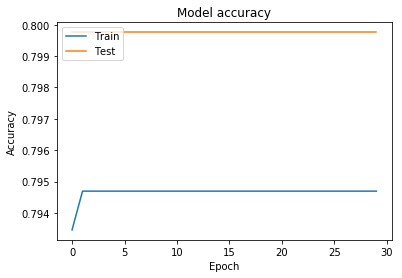


 Função de Custo: 3.29%


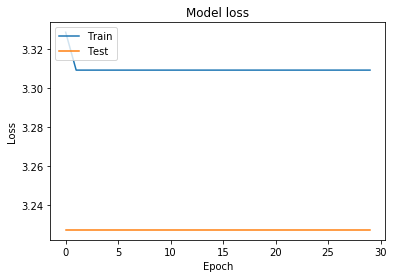

In [4]:
model = Sequential()

model.add(Dense(units=100, activation='relu', input_dim=num_input))
model.add(Dense(units=59, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, validation_split=0.30, epochs=30, batch_size=16, verbose=1)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=16)
print("\n Taxa de acerto: %.2f%%" % (loss_and_metrics[1]*100))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print("\n Função de Custo: %.2f%%" % (loss_and_metrics[0]))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


<h4> Regularização </h4>

A regularização pode ajudar a reduzir o overfitting. Analisaremos os efeitos de três técnicas de regularização no 
código, a técnica L1, L2 e Dropout. A intenção da regularização é fazer com que a rede prefira aprender pesos pequenos. Os pesos grandes só são permitidos se melhorarem bastante a primeira parte da função de custo, ou seja, ela tenta encontrar pequenos pesos e minimizar a função de custo original.

Tanto na técnica L1 quanto na L2 o resultado é a diminuição dos valores dos pesos, mas a maneira como os pesos diminuem é diferente. Quando um peso específico tem uma grande magnitude, a regularização L1 reduz o peso muito menos do que a Regularização L2, mas, quando |w| é pequeno, a regularização L1 reduz o peso muito mais do que a regularização L2, assim a regularização L1 tende a concentrar o peso da rede em um número relativamente pequeno de conexões de alta importância, enquanto os outros pesos são direcionados para zero.

Configurações utilizadas no modelo de regularização L1:

Train on 19425 samples, validate on 8325 samples
Epoch 1/30
19425/19425 [==============================] - 4s 183us/step - loss: 29190.9675 - acc: 0.7456 - val_loss: 15.9022 - val_acc: 0.7992
Epoch 2/30
19425/19425 [==============================] - 4s 226us/step - loss: 3.7580 - acc: 0.7943 - val_loss: 5.1129 - val_acc: 0.7992
Epoch 3/30
19425/19425 [==============================] - 3s 153us/step - loss: 1.3368 - acc: 0.7945 - val_loss: 2.7711 - val_acc: 0.7993
Epoch 4/30
19425/19425 [==============================] - 4s 227us/step - loss: 0.7171 - acc: 0.7947 - val_loss: 1.8871 - val_acc: 0.7994
Epoch 5/30
19425/19425 [==============================] - 5s 270us/step - loss: 0.5976 - acc: 0.7947 - val_loss: 1.8016 - val_acc: 0.7993
Epoch 6/30
19425/19425 [==============================] - 5s 272us/step - loss: 0.5670 - acc: 0.7946 - val_loss: 1.7501 - val_acc: 0.7994
Epoch 7/30
19425/19425 [==============================] - 5s 273us/step - loss: 0.5355 - acc: 0.7947 - val_loss: 1.728

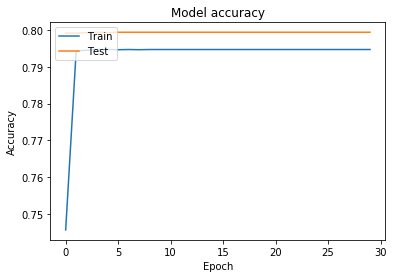


 Função de Custo: 1.34%


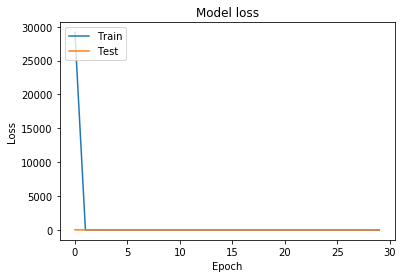

In [5]:
model = Sequential()

model.add(Dense(units=100, activation='relu', input_dim=num_input, activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(units=59, activation='relu', activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.30, epochs=30, batch_size=16, verbose=1)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=16)

print("\n Taxa de acerto: %.2f%%" % (loss_and_metrics[1]*100))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


print("\n Função de Custo: %.2f%%" % (loss_and_metrics[0]))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Com essas configurações no L1 foi obtido uma taxa de acerto de 79,63%. A figura 8 demostra o histórico da acurácia para o L1 com valor de 0.1.
![l1 - 0,1](https://uploaddeimagens.com.br/images/001/744/765/full/l1-0_01.png?1543200998)  <center> *figura 8 - Histórico de acurácia para L1 = 0.1* </center>

A figura 9 demostra o histórico da acurácia para o L1 com valor de  de 0.01 nesse caso o resultado do teste apresentou ser pior do que o utilizado com 0.1, pois a taxa de acerto obtida foi de 79,60%.

![l1 - 0,01](https://uploaddeimagens.com.br/images/001/744/780/full/l1-0_01.png?1543201813)  <center> *figura 9 - Histórico de acurácia para L1 = 0.01* </center>


Configurações utilizadas no modelo de regularização L2:

Train on 19425 samples, validate on 8325 samples
Epoch 1/30
19425/19425 [==============================] - 4s 186us/step - loss: 5.6736 - acc: 0.6501 - val_loss: 3.2280 - val_acc: 0.7998
Epoch 2/30
19425/19425 [==============================] - 3s 168us/step - loss: 3.3090 - acc: 0.7947 - val_loss: 3.2266 - val_acc: 0.7998
Epoch 3/30
19425/19425 [==============================] - 3s 171us/step - loss: 10.1153 - acc: 0.3661 - val_loss: 12.7397 - val_acc: 0.2008
Epoch 4/30
19425/19425 [==============================] - 3s 158us/step - loss: 12.6293 - acc: 0.2079 - val_loss: 12.7405 - val_acc: 0.2010
Epoch 5/30
19425/19425 [==============================] - 5s 241us/step - loss: 12.6413 - acc: 0.2072 - val_loss: 12.7411 - val_acc: 0.2008
Epoch 6/30
19425/19425 [==============================] - 3s 173us/step - loss: 12.6403 - acc: 0.2072 - val_loss: 12.7404 - val_acc: 0.2008
Epoch 7/30
19425/19425 [==============================] - 5s 271us/step - loss: 12.6397 - acc: 0.2072 - val_loss: 1

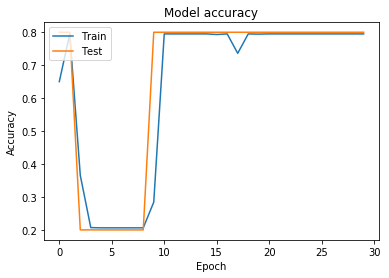


 Função de Custo: 0.51%


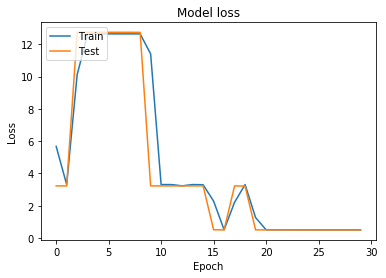

In [6]:
model = Sequential()

model.add(Dense(units=100, activation='relu', input_dim=num_input, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=59, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.30, epochs=30, batch_size=16, verbose=1)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=16)

print("\n Taxa de acerto: %.2f%%" % (loss_and_metrics[1]*100))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print("\n Função de Custo: %.2f%%" % (loss_and_metrics[0]))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Com essas configurações no L2 foi obtido uma taxa de acerto de 79,62%. A figura 10 demostra o histórico da acurácia para o L1 com valor de 0.01, a média da taxa de acerto de treino é de 79,61% e de teste é de 79,65%.
![l1 - 0,01](https://uploaddeimagens.com.br/images/001/744/708/full/l2-0_01.png?1543197697)  <center> *figura 10 - Histórico de acurácia para L2 = 0.01* </center>

A figura 11 demostra o histórico da acurácia para o L2 com valor de  de 0.1, nesse caso o resultado do teste apresentou ser praticamente o mesmo que o anterior.

![l1 - 0,1](https://uploaddeimagens.com.br/images/001/744/722/full/l2-0_1.png?1543199138)  <center> *figura 11 - Histórico de acurácia para L2 = 0.1* </center>

O Dropout é uma técnica diferente da L1 e L2, ele não depende da modificação da função de custo, ele modifica a própria rede. O Dropout elimina aleatoriamente (e temporariamente) alguns dos neurônios ocultos na rede, mas deixa os neurônios de entrada e saída intocados.

Configurações utilizadas no Dropout:

Train on 19425 samples, validate on 8325 samples
Epoch 1/30
19425/19425 [==============================] - 4s 201us/step - loss: 6.8309 - acc: 0.5730 - val_loss: 3.2271 - val_acc: 0.7998
Epoch 2/30
19425/19425 [==============================] - 3s 158us/step - loss: 3.5049 - acc: 0.7823 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 3/30
19425/19425 [==============================] - 3s 157us/step - loss: 3.4220 - acc: 0.7876 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 4/30
19425/19425 [==============================] - 4s 227us/step - loss: 3.3991 - acc: 0.7890 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 5/30
19425/19425 [==============================] - 3s 165us/step - loss: 3.3557 - acc: 0.7918 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 6/30
19425/19425 [==============================] - 5s 242us/step - loss: 3.3460 - acc: 0.7924 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 7/30
19425/19425 [==============================] - 3s 167us/step - loss: 3.3443 - acc: 0.7925 - val_loss: 3.2275 - v

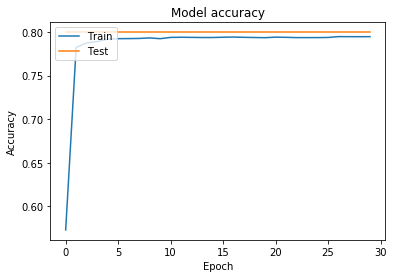


 Função de Custo: 3.29%


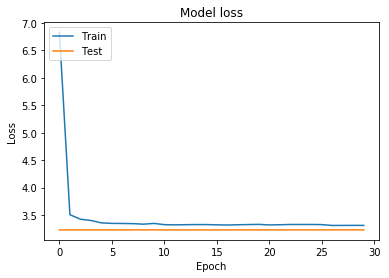

In [7]:
model = Sequential()

model.add(Dense(units=100, activation='relu', input_dim=num_input))
model.add(Dropout(0.5))
model.add(Dense(units=59, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.30, epochs=30, batch_size=16, verbose=1)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=16)

print("\n Taxa de acerto: %.2f%%" % (loss_and_metrics[1]*100))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print("\n Função de Custo: %.2f%%" % (loss_and_metrics[0]))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Com o Dropout de 0.5 foi obtido uma taxa de acerto de 79,62%, a figura 12 mostra o histórico da acurácia na fase de treino e teste.

![drop - 0,5](https://uploaddeimagens.com.br/images/001/744/803/full/drop-0_5.png?1543204505) <center> *figura 12 - Histórico de acurácia para Dropout = 0.5* </center>

Com o Dropout de 0.3 foi obtido uma taxa de acerto de 79,62%, a figura 13 mostra o histórico da acurácia na fase de treino e teste.

![drop - 0,3](https://uploaddeimagens.com.br/images/001/744/821/full/drop-0_3.png?1543206419) <center> *figura 13 - Histórico de acurácia para Dropout = 0.3* </center>

Com o Dropout de 0.7 foi obtido uma taxa de acerto de 79,62%, a figura 14 mostra o histórico da acurácia na fase de treino e teste.

![drop - 0,7](https://uploaddeimagens.com.br/images/001/744/819/full/drop-0_7.png?1543206380) <center> *figura 14 - Histórico de acurácia para Dropout = 0.7* </center>

<h4> Hiperparâmetros </h4>

Inicialmente será decidido o número de neuronios utilizados na segunda camada oculta, como mostra o código a seguir:

Train on 19425 samples, validate on 8325 samples
Epoch 1/5
19425/19425 [==============================] - 3s 168us/step - loss: 3.3552 - acc: 0.7918 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 2/5
19425/19425 [==============================] - 3s 151us/step - loss: 3.3091 - acc: 0.7947 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 3/5
19425/19425 [==============================] - 3s 145us/step - loss: 3.3091 - acc: 0.7947 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 4/5
19425/19425 [==============================] - 3s 141us/step - loss: 3.3091 - acc: 0.7947 - val_loss: 3.2275 - val_acc: 0.7998
Epoch 5/5
19425/19425 [==============================] - 3s 147us/step - loss: 3.3091 - acc: 0.7947 - val_loss: 3.2275 - val_acc: 0.7998

 Taxa de acerto: 79.62%


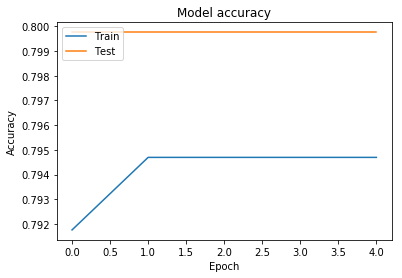


 Função de Custo: 3.29%


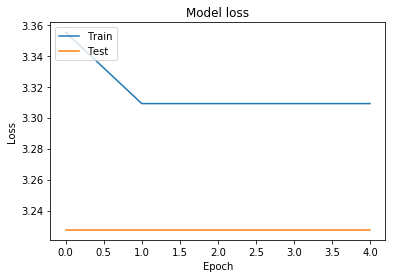

In [9]:
model = Sequential()

model.add(Dense(units=80, activation='relu', input_dim=num_input))
model.add(Dense(units=59, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.30, epochs=5, batch_size=16, verbose=1)

print("\n Taxa de acerto: %.2f%%" % (loss_and_metrics[1]*100))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print("\n Função de Custo: %.2f%%" % (loss_and_metrics[0]))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

A figura 15 mostra o histórico da acurácia obtido, utilizando 20 neuronios na segunda camada oculta. A taxa de acerto foi de 20,37%.

![hp - 20](https://uploaddeimagens.com.br/images/001/744/843/full/hp-01.pnh.PNG?1543210289) <center> *figura 15 - Histórico de acurácia para 2² camada oculta = 20* </center>

A figura 16 mostra o histórico da acurácia obtido, utilizando 59 neuronios na segunda camada oculta. A taxa de acerto foi de 79,62%. Foi testado até valores maiores, como 200 neuronios, mas apresentou o mesmo resultado, portanto a segunda camada oculta irá utilizar 59 neuronios.

![hp - 59](https://uploaddeimagens.com.br/images/001/744/842/full/hp-02.PNG?1543210194) <center> *figura 16 - Histórico de acurácia para 2² camada oculta = 59* </center>

Como se pode observar, no primeiro caso ocorre o overfitting, então concluimos que valores baixos na segunda camada oculta não é bom, por isso será utilizado 59 neuronios.

Outro hiperparâmetro que pode ser ajustado é quantidade de dados retirados do treino para validação, foi testado utilizar valores de 25%, 30% e 40%, mas não houve variação na taxa de acerto, a mesma se manteve em 79.62% Então será mantido com o valor de 25%. Além da validação foi feito modificações no tamanho do batch, mas a medida que foi aumentando o valor do batch, o mesmo manteve a taxa de acerto, até cair para 20%.


<h3> Resultados </h3>

O melhor resultado que conseguimos obter foi o de 79,63%. Chegamos a esse resultado utilizando a regularização L1 na rede neural. A rede neural conseguiu obter bons resultados. De acordo com [Kelwin Fernandes
](https://pdfs.semanticscholar.org/ad7f/3da7a5d6a1e18cc5a176f18f52687b912fea.pdf), utilizando 70% dos dados para treino e 30% para teste, o KNN e o Naive Bayes obteve uma taxa de acerto de 62%, o SVM e o AdaBoost de 66% e o RF de 67%. Para realizar mais comparações, também foi realizado teste para a base de dados utilizando a Árvore de Decisão, onde a mesma apresentou um resultado melhor, obtendo uma taxa de acerto de 79,66%.
